# How to Create Excitatory IAF Neuron

## Step 1. IntFire1(): Create IAF neuron

In [1]:
from neuron import h, gui

# to assign IntFire1() to IAF
iaf = h.IntFire1()

# refractory period
iaf.refrac = 5

# time constant, decay period
iaf.tau = 10

## Step 2. NetStim(): Generate Excitatory Inputs 

In [2]:
# to assign NetStim() to EX
ex = h.NetStim()

# the time inputs comes (starts)
ex.start = 10

# the time between each input
ex.interval = 5

# the number of inputs
ex.number = 5

# the level of noise (from 0 to 1)
ex.noise = 0

## Step 3. NetCon(): Connect the inputs to the IAF neuron

In [3]:
# to connect the source to the target
nc = h.NetCon(ex, iaf)

# IntFire1() has its own threshold, 1
# threshold of Netcon wouldn't do anything
# so, this is for inituitive understanding
nc.threshold = 1

nc.delay = 0
nc.weight[0] = 0.5

## Step 4. Plot the results

In [4]:
h.tstop = 50

# dummy section for NEURON scripting
soma = h.Section()

# time
tvec = h.Vector().record(h._ref_t)

vvec = h.Vector().record(iaf._ref_m)

# IAF1 doesn't have membrane potential, use state variable

In [5]:
h.init()
h.run()

0.0

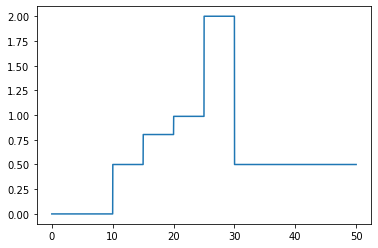

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(tvec, vvec)
plt.show()

## Step 5. Plotting the analytic variable - advance function

In [7]:
# dummy section for NEURON scripting
soma = h.Section()

# time
# tvec = h.Vector().record(h._ref_t)

# redefine the NEURON's advance
h('proc advance() {nrnpython("myadvance()")}')

vvec_analytic = h.Vector()

def myadvance():
    # catch analytic variable of IntFire1 during simulation
    vvec_analytic.append(iaf.M())
    h.fadvance()

In [8]:
h.init()
h.run()

0.0

In [9]:
# catch the last analytic variable of IntFire1
vvec_analytic.append(iaf.M())

Vector[5]

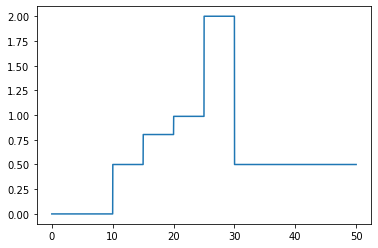

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(tvec, vvec)
plt.show()

## Step 6. Raster plot

In [11]:
spkts = h.Vector()

# inactive NetCon just record spiketime
spkts_nc = h.NetCon(iaf, None)

spkts_nc.record(spkts)

0.0

In [12]:
h.init()
h.run()

0.0

In [13]:
# catch the last analytic variable of IntFire1
#vvec.append(iaf.M())

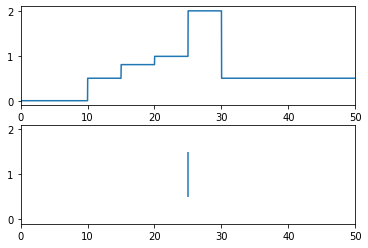

In [14]:
import matplotlib.pyplot as plt

plt.figure()

plt.subplot(2,1,1)
plt.plot(tvec, vvec)
plt.xlim(tvec.min(), tvec.max())

plt.subplot(2,1,2)
plt.eventplot(spkts)
plt.xlim(tvec.min(), tvec.max())

plt.show()